In [1]:
from xlearn.segmentation import seg_train, seg_predict
import dxchange
import matplotlib.pyplot as plt

batch_size = 4000
nb_epoch = 50
nb_down = 3
nb_gpu = 4

Using TensorFlow backend.


In [2]:
# define the data path
spath = '../../test/seg_data/'
# define the path to save the training weights
wpath = spath + 'weights_seg.h5'
# read the training input and output
imgx = dxchange.read_tiff(spath + 'train_input.tif')
imgy = dxchange.read_tiff(spath + 'train_output.tif')

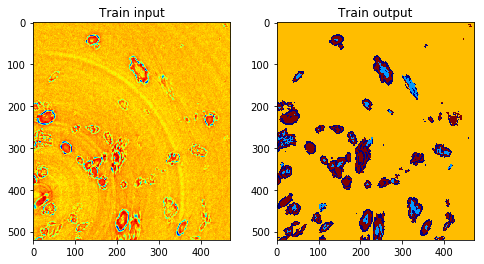

In [3]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(imgx, cmap = 'jet')
plt.title('Train input')
plt.subplot(1,2,2)
plt.imshow(imgy, cmap = 'jet')
plt.title('Train output')
plt.show()

In [4]:
# train the model
mdl = seg_train(imgx, imgy, batch_size = batch_size, nb_epoch = nb_epoch, nb_down = nb_down, nb_gpu = nb_gpu)
# save the trained weights
mdl.save_weights(wpath)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 32, 32, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 32, 32, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 32, 32, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_3 (

In [5]:
# read the testing data
img_test = dxchange.read_tiff(spath + 'test_input.tif')
# segmentation for the testing data
seg_predict(img_test, wpath, spath, nb_down = nb_down, nb_gpu = nb_gpu)

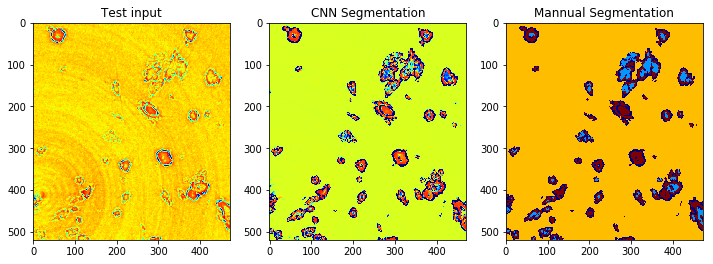

In [6]:
img_prd = dxchange.read_tiff(spath+'prd.tiff')
img_target = dxchange.read_tiff(spath+'test_handseg.tif')
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(img_test, cmap='jet')
plt.title('Test input')
plt.subplot(1,3,2)
plt.imshow(img_prd, cmap='jet')
plt.title('CNN Segmentation')
plt.subplot(1,3,3)
plt.imshow(img_target, cmap='jet')
plt.title('Mannual Segmentation')
plt.show()